# LSTM
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequence data.
Key challenges standard RNNs face are vanishing and exploding gradients during backpropagation, which limits learning long sequences.
LSTMs address this by using a memory cell and gating mechanisms (input, forget, output gates) to control information flow, enabling the network to maintain relevant information across time steps.

## LSTM units:

- Cell state (memory) that carries long-term information.
- Forget gate to decide what information to discard.
- Input gate to decide what new information to store.
- Output gate to decide what to output.
- LSTMs are widely used in time series forecasting, language modeling, speech recognition, and many other sequential tasks.

In [10]:
## Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [11]:
# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
    X = []
    y = []
    x_vals = np.linspace(0, 100, total_samples + seq_length)
    sine_wave = np.sin(x_vals)

    for i in range(total_samples):
        X.append(sine_wave[i:i+seq_length])
        y.append(sine_wave[i+seq_length])

    X = np.array(X)
    y = np.array(y)
    # Reshape X for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Prepare data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (1000, 50, 1)
Output shape: (1000,)


In [14]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length,1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3503 - val_loss: 0.0458
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0223 - val_loss: 0.0021
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0019 - val_loss: 5.2340e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7200e-04 - val_loss: 3.1057e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.9458e-04 - val_loss: 2.3778e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2174e-04 - val_loss: 1.6654e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.4705e-04 - val_loss: 1.1089e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.9284e-05 - val_loss: 7.9853e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.3860e-05 - val_loss: 4.0630e-05
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7509e-05 - val_loss: 2.0717e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.8598e-05 - val_loss: 1.4060

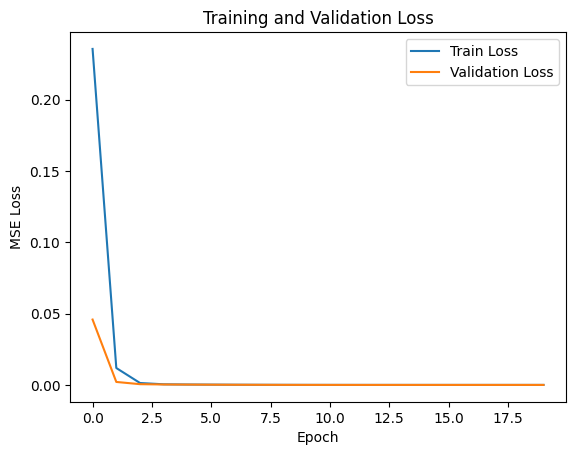

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


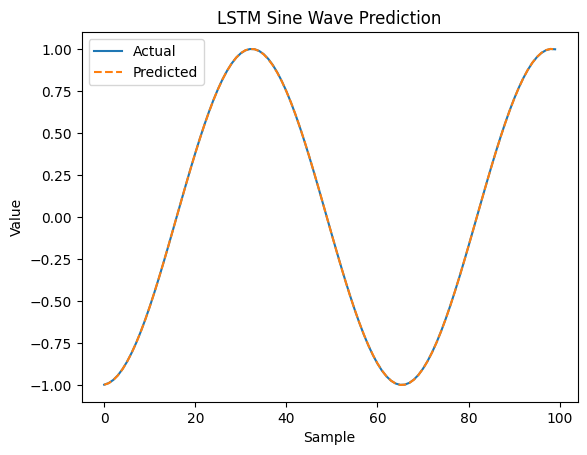

In [18]:
# Make predictions
predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()